# Unix essentials

### RECAP

Prompt <b>$</b> or <b>%</b> indicates command-line = waiting for command

Filesystem is a term that describes how data in arranged on a computer. It's made out of directories and files. Directory = folder.

Directories and files have an "address", which is called <b>path</b>. 

Types of paths:

1.Absolute path starts with '/' that indicate it starts from the root directory ("where it all begins")

<i>/Users/grachetng/Desktop/PhD documents/Proposal/proposal.docx</i>

2.Relative path is relative to our current working directory ("from this point forward")

<i>PhD documents/Proposal/proposal.docx</i>

Each user has 2 private directories: /home and /scratch. Nothing backed up!  
Your /home has 25Gb storage quota. The home directory is also written as ~  
Your /scratch is for large files, space is "unlimited" and shared.  
The /opt is a shared directory that contains the applications (aka programs).  

When you log in, you are automatically in your /home and you are located in one of the login nodes.   
This morning, we'll be located in the login nodes. In the login nodes, you only can edit and manipulate files and scripts. If you want to run a job or a script, you must use the batch scheduler command.

This afternoon, we'll submit a job through the scheduler. The batch scheduler receives your job, then puts it in the queue to be executed in a computer node. Once your job finishes, the scheduler sends the results back to your log in folder.

### Any questions from the training?

### Let's go!!

$ whoami  

$ pwd  

$ ls  

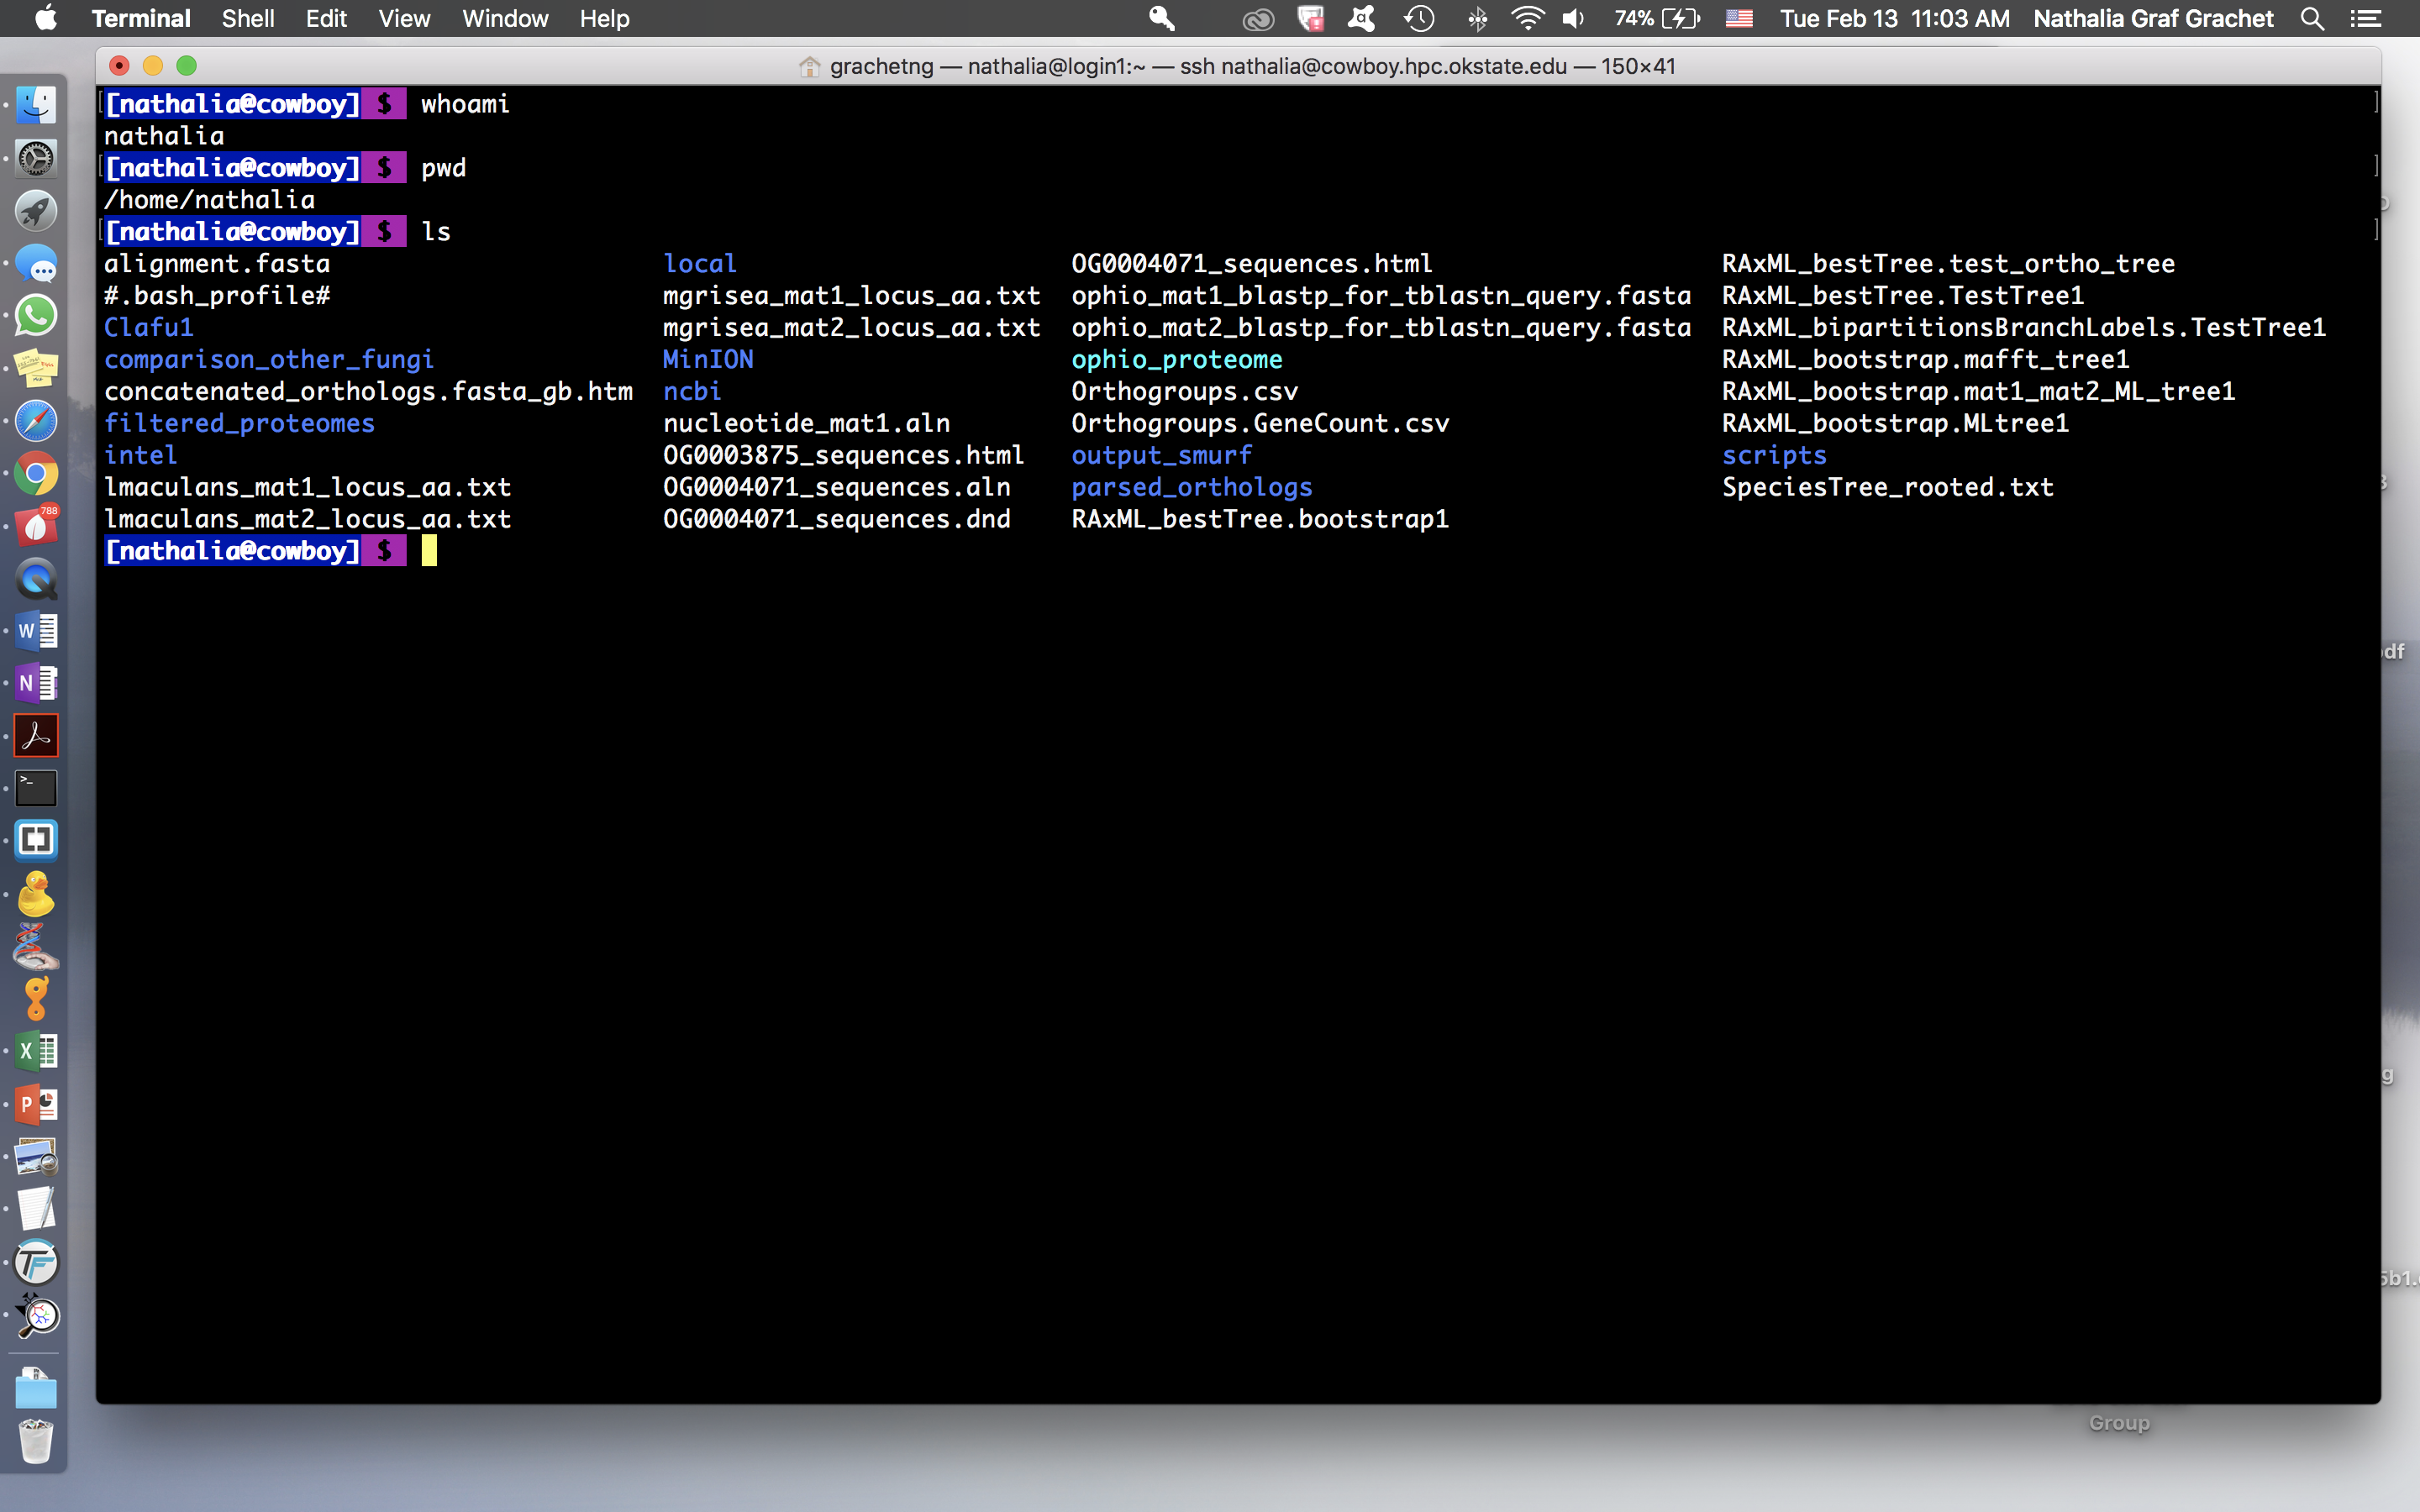

Many commands such as 'ls' have flags. Flags are like 'options' of a command.  
In the case of 'ls', flags are options to display the same list in different ways.

My favorite flag is  
 
$ ls -lhtrc  

Why did you ask?!

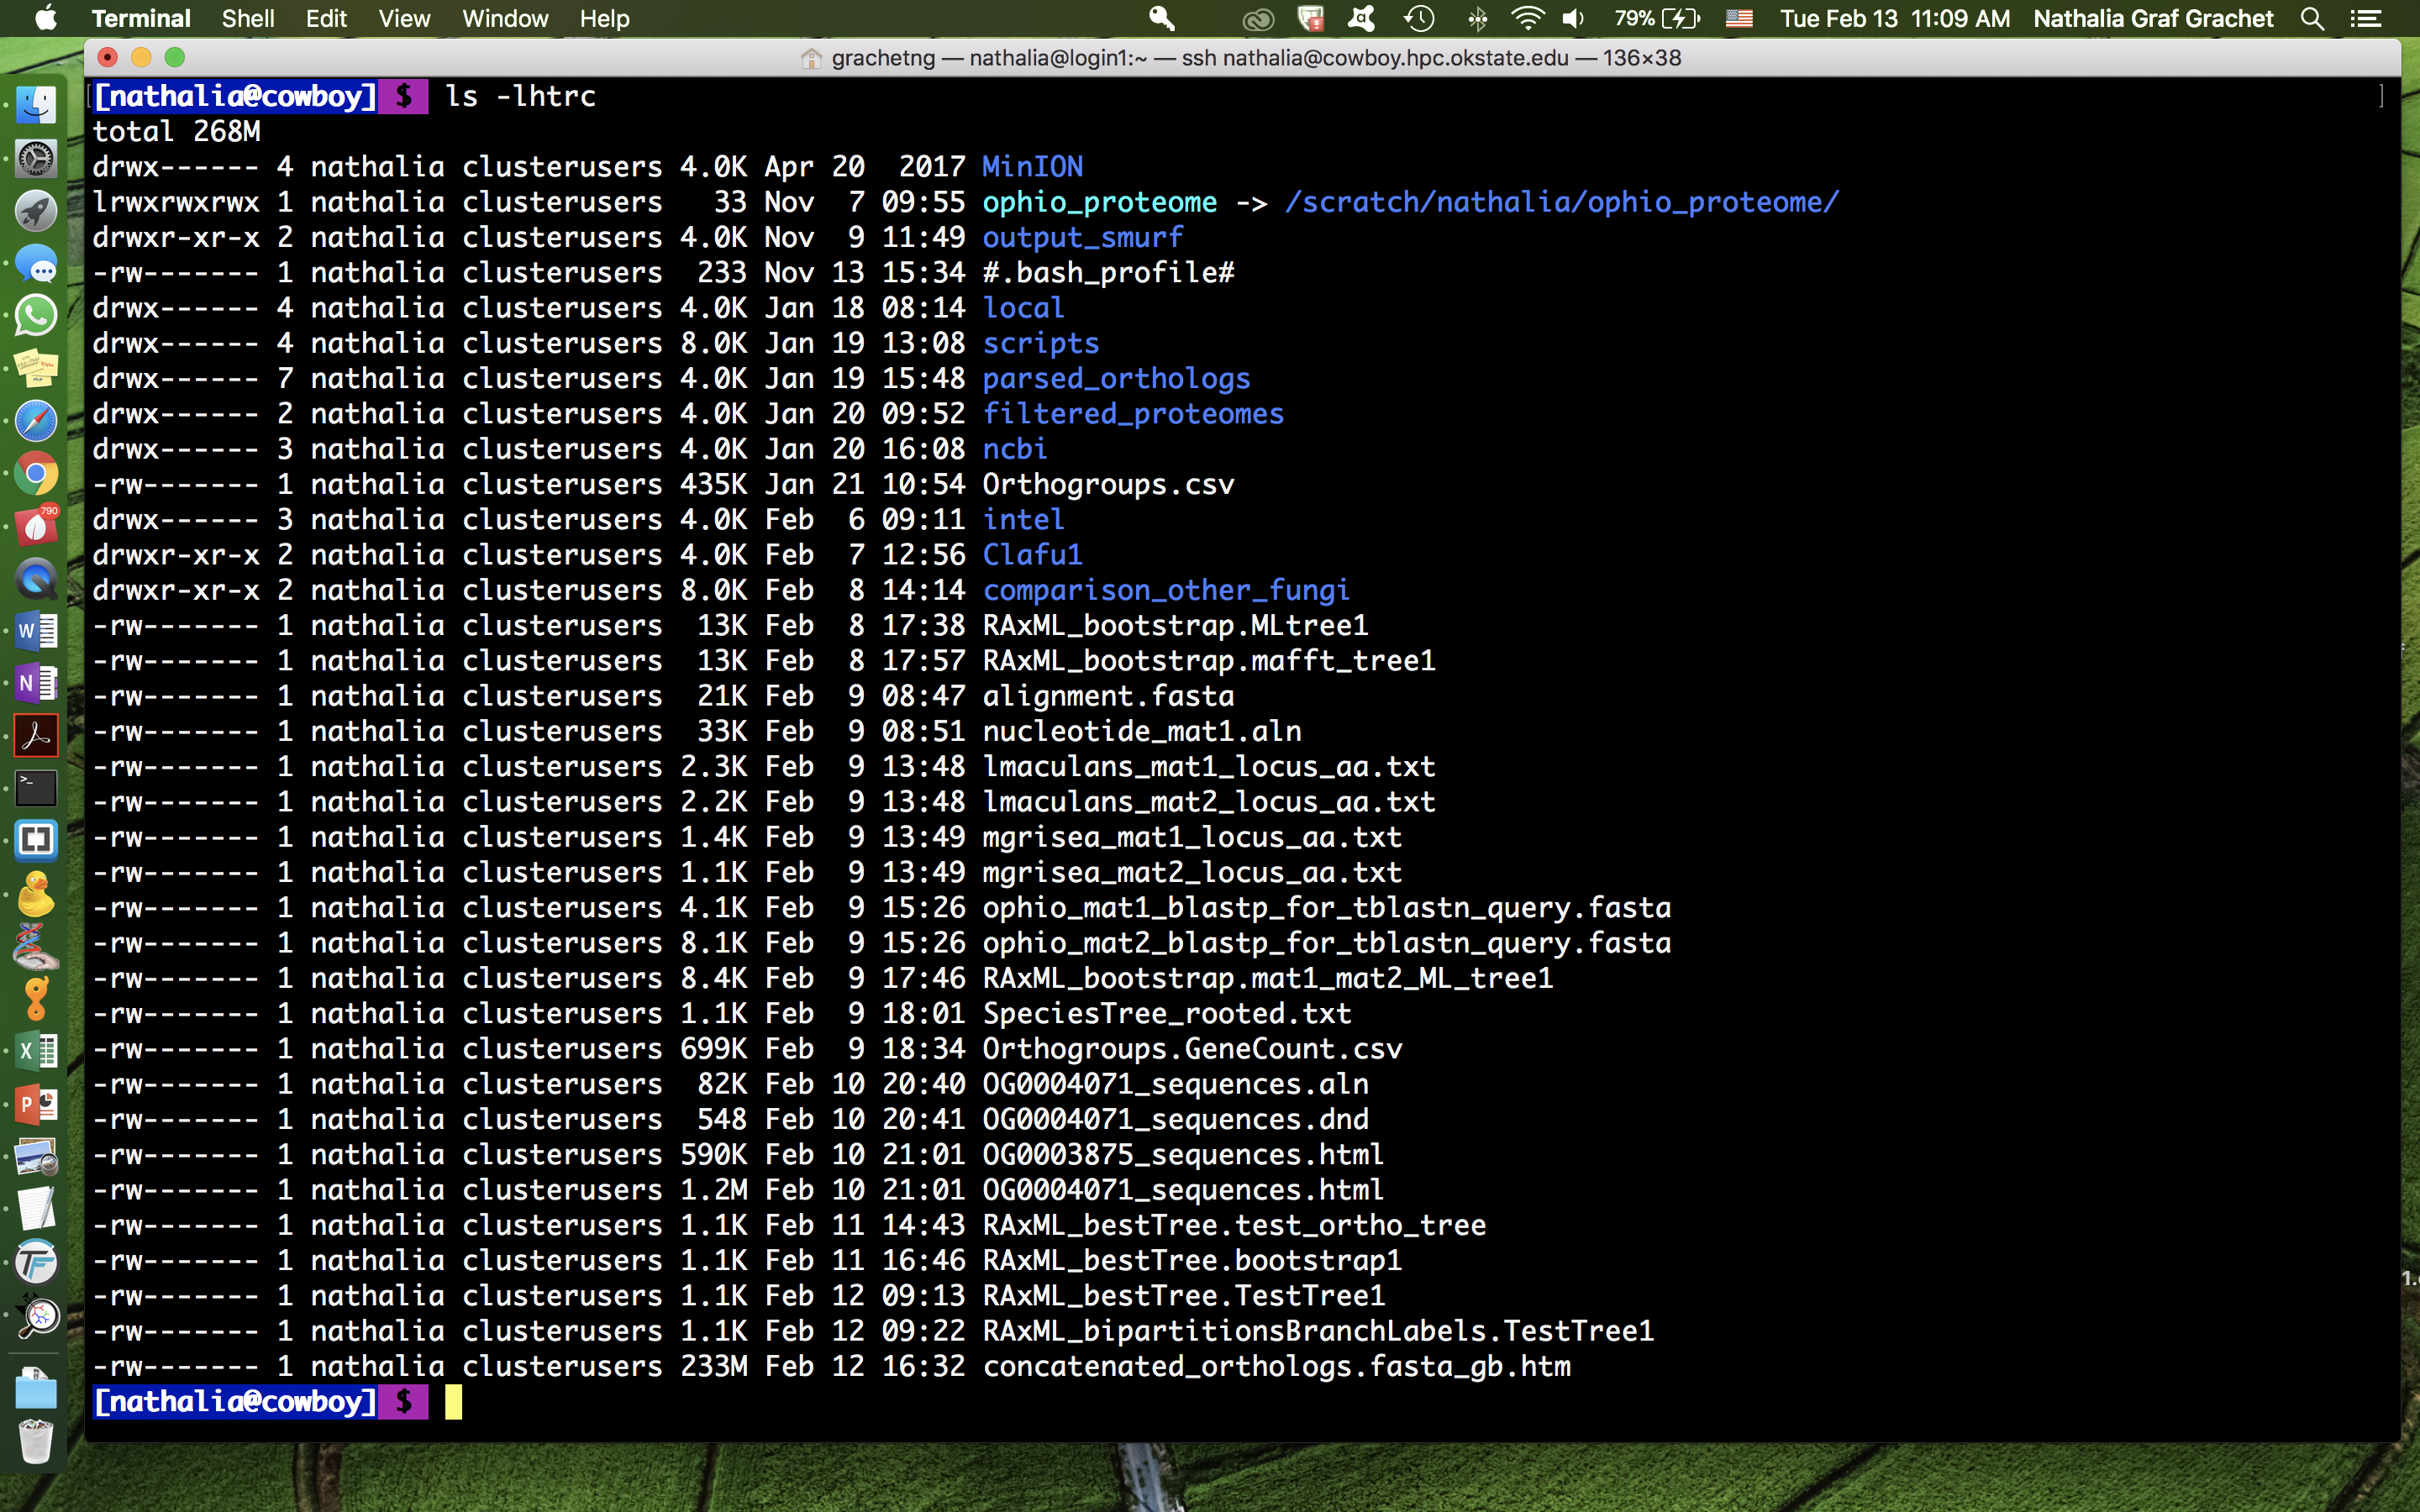

I like this a lot! It is ordered by date and name, and I can see the file sizes in human-readable form.  
I like seeing the file sizes to make sure my analysis is correct. I have had alignments completed with file sizes very small.  
Alignment files (.sam and .bam file extensions) are often very large files (in the Gb of size).  
Sometimes your analysis works, but it works in the wrong way!  

"OK Nathy... I wanna know ALL flag options."  
It's your lucky day! Every command has a 'man' page with a lot of info about the command, flags, etc.

$ man ls

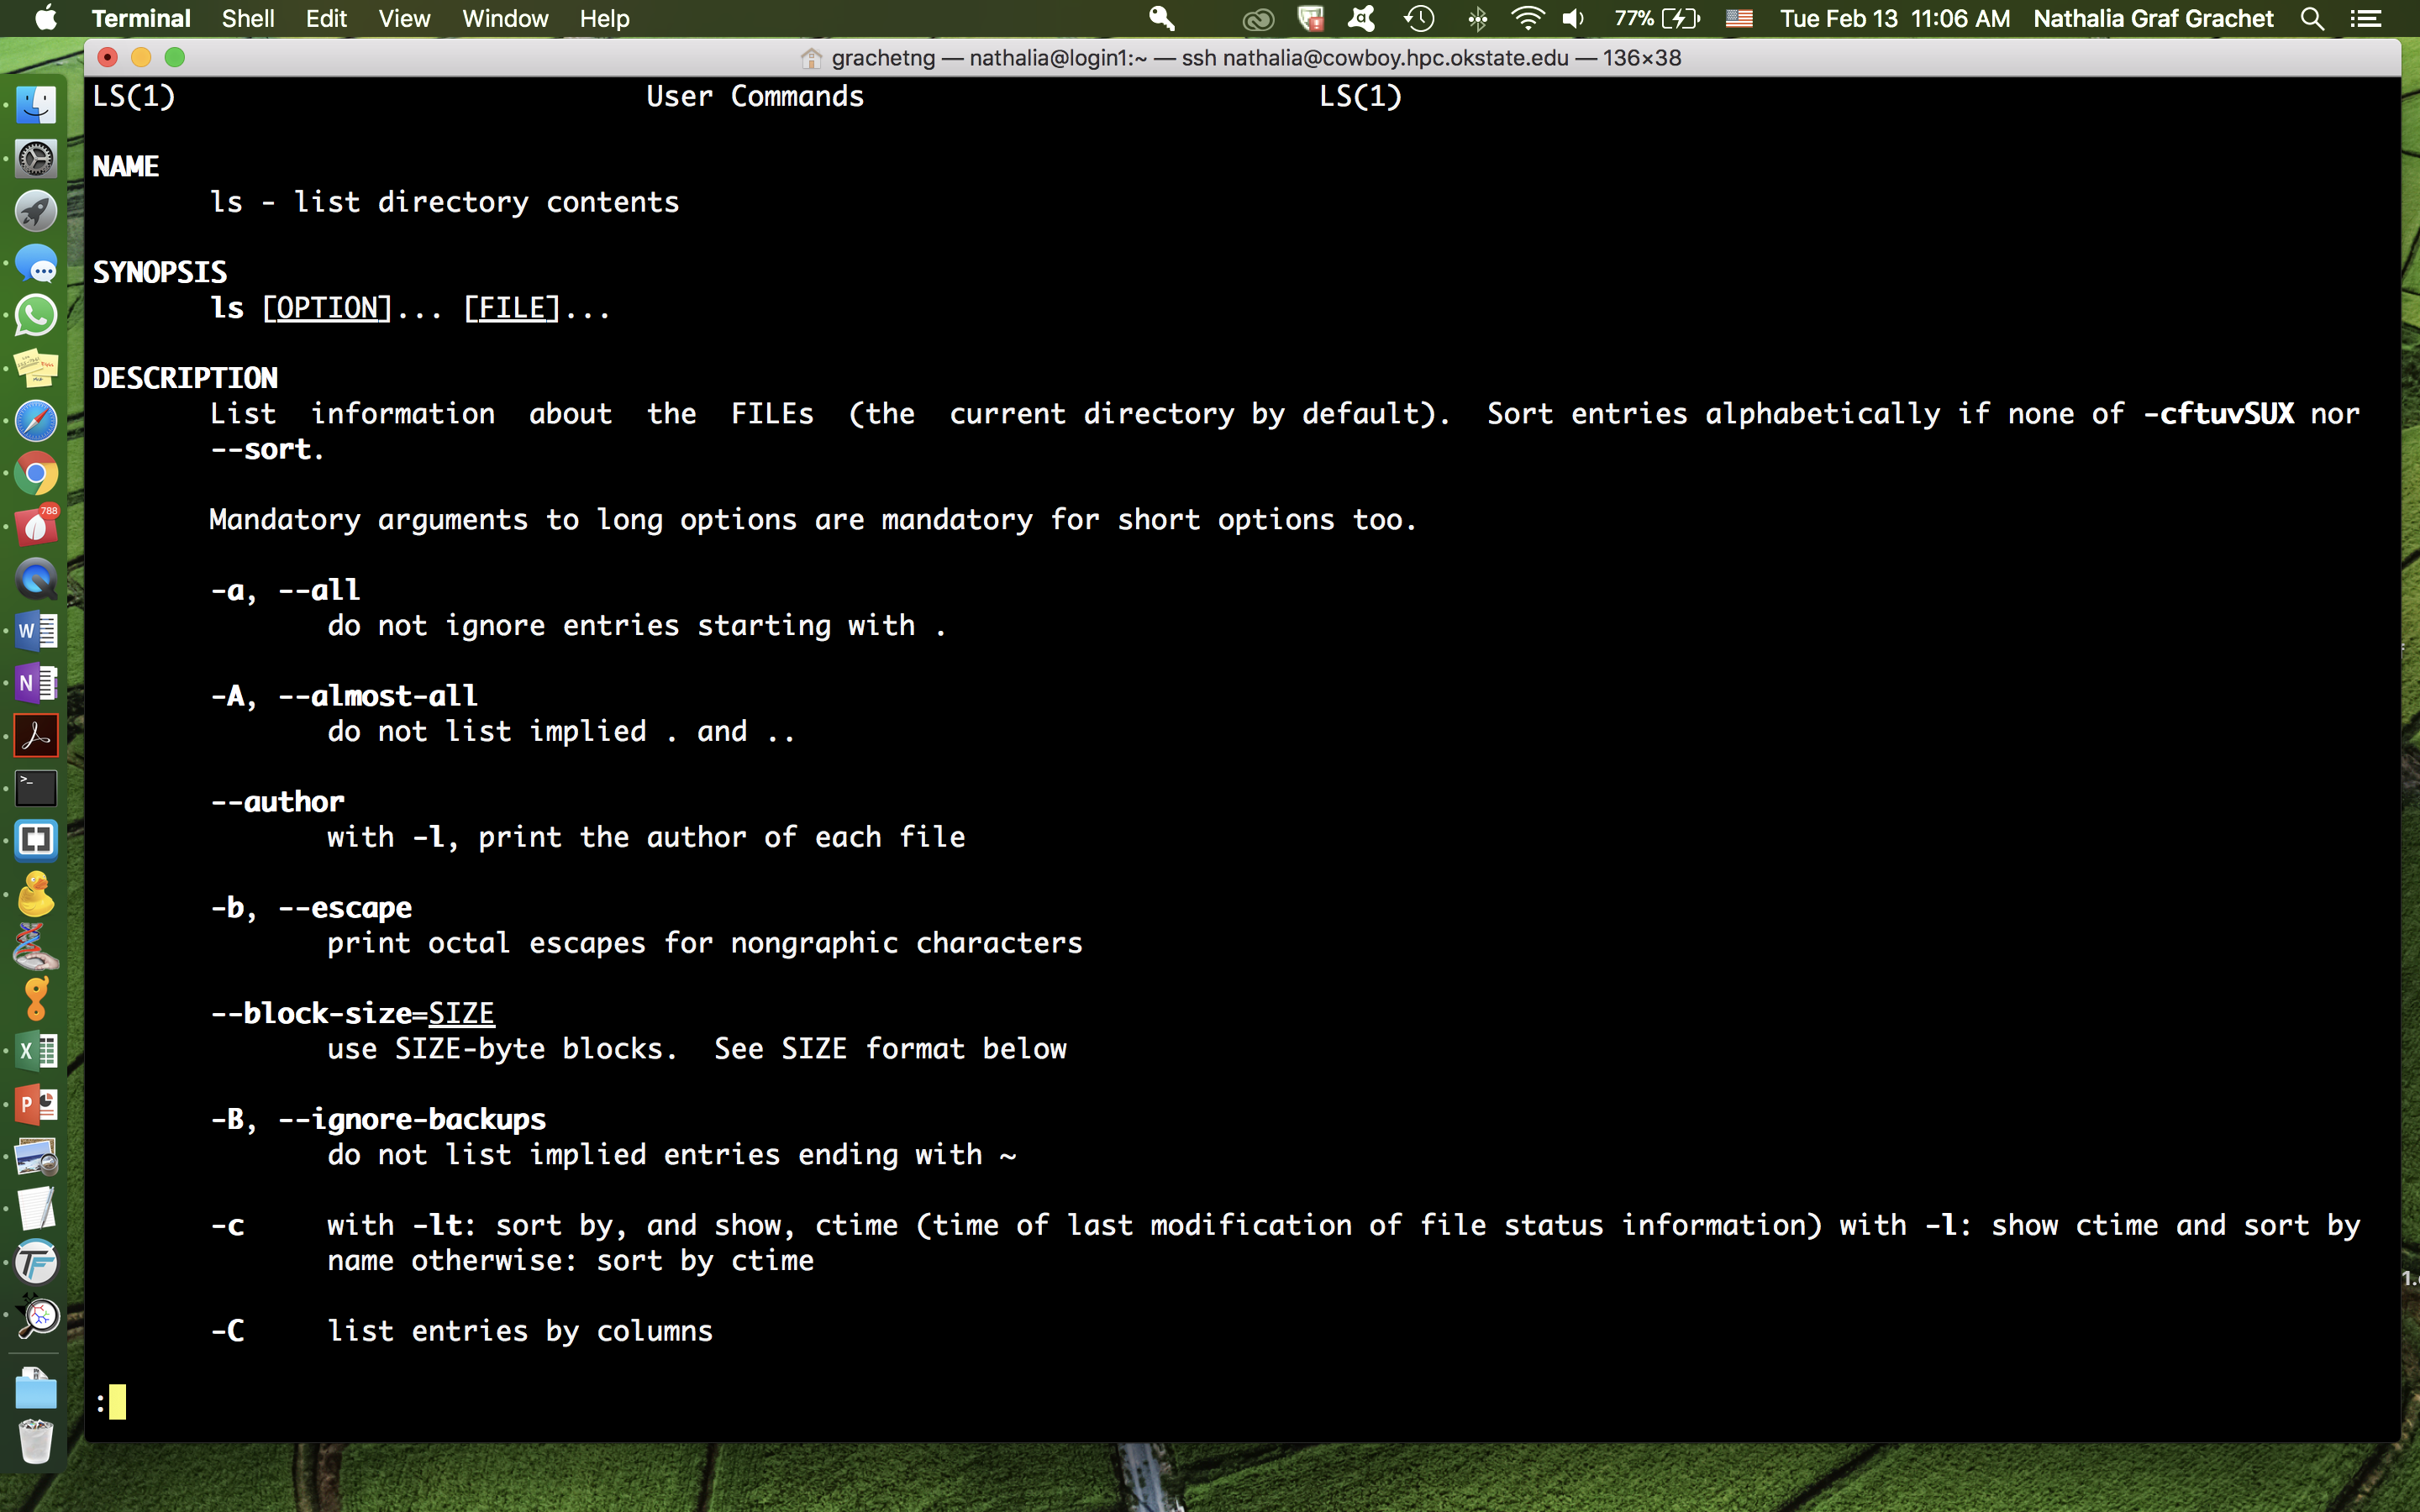

'man' pages appear as a sort of pop up window in your terminal. 

'man' pages are very useful when you are learning command-line.   
There is useful information there, but it might not be easy to understand how to use it at first. Let's break it down...  

NAME = describes the name of the command

SYNOPSIS = how to call the command and use flags 

    Obviously, you type 'ls' first  
    [OPTIONS] means: options are optional (wow!) because they are inside [brackets] 
    If you want to use flags, then choose from the list below and use them with a -dash
    [FILE] is also optional, by default it's the current directory

DESCRIPTION = options that can be used  

Press 'q' to exit.

Ok... let's move on...

Most of the time, however, you'll be using data in .fasta, .fastq, .gtf, .gff, etc that you can manipulate in similar way.  
But, you won't be typing in DNA, RNA or protein sequences of a genome in a text file, right?!   
Let's download a file from the web, and do some stuff with it.

Open the text-file we sent you by e-mail and copy link #1:  
http://www.aspergillusgenome.org/download/sequence/A_nidulans_FGSC_A4/current/A_nidulans_FGSC_A4_current_chromosomes.fasta.gz

In [8]:
$ curl -O  http://www.aspergillusgenome.org/download/sequence/A_nidulans_FGSC_A4/current/A_nidulans_FGSC_A4_current_chromosomes.fasta.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9155k  100 9155k    0     0  5685k      0  0:00:01  0:00:01 --:--:-- 5682k


It prints in different lines, but you don't type enter! It just does not fit all the contents in one line.  
Files with .gz or .gunzip are size-compressed. To uncompress:

$ gunzip A_nidulans_FGSC_A4_current_chromosomes.fasta.gz 

'ARE YOU REALLY GONNA MAKE ME TYPE THIS ENTIRE FILE NAME?'

Type A_nid and hit the tab key.  

+ <b>Tab autocompletes</b> names of files and directories in the current directory.
This is good to avoid typos! Use tab, and use often!

Check what happened after uncompression...

$ ls  

Make sure you create a folder to 'save' the original file, neve touch it again  

$ mkdir original  

$ cp A_nidulans_FGSC_A4_current_chromosomes.fasta original/  

Then, open the .fasta file and investigate the 'working' file  

$ less A_nidulans_FGSC_A4_current_chromosomes.fasta

+ <b>Questions</b>: Which file is this? What does it make a fasta file? What are the mandatory components? 
        Two lines: first header, second sequence. Header must start with '>' and no spaces

Get a sense of the size of the file we're dealing with.  

How many lines?

$ wc -l < A_nidulans_FGSC_A4_current_chromosomes.fasta

Direct standard input or stdin with '<' or simply ommit

$ wc -l A_nidulans_FGSC_A4_current_chromosomes.fasta

When you see '#' it means the start of a comment. Anything after the # the computer won't take as a command.  
You should not type the # comments! 

In [16]:
$ head -10 A_nidulans_FGSC_A4_current_chromosomes.fasta # prints the first 10 lines

>ChrIII_A_nidulans_FGSC_A4 (3470897 nucleotides)
CAACCTTGTTGTACTGAAATGGCTACCTCTGCCCCCCAGACCCTGATTTGCCGCTGCTCA
ACTGACCTTACAAGCCCCCTGAGCCCCCCCAGCCTGACACCAACCATCATCAATGCAAAG
TCAAAGAGGAGATACTACCACAATCAGCAATGGGAGCAGGAGTGTGTGCTGCAGGCCAGC
CTGATAACAGCTCTGCCTCAGTACCCTGCTCCCTTGGACAGCATGGATGAGCTTGTGATC
GCAAAGCCCGCAGCAGACACCAACAACTCCCACAACAACAACAACAACTCCCACAACAAC
AACAATAACAACAACAACACCAACACCAACAGCAACAACAGCCAGGACGCGGACAGCAAC
GCGGACAGCGACCACAACAGCAACAGTGACCAGAATCAGCAGAAGCCTATTATTGAGACT
ACTGATGATCACAGTGTAGATGACCAGCACATCGACACCGTCAGTGACAGCGATGAACCC
AGCTCCCCAATCATGGGCATTGGCCTCCGCCCCATCAGCAAGCCTGTGTCTGTTGTTGTC


In [18]:
$ tail -10 A_nidulans_FGSC_A4_current_chromosomes.fasta # prints the last 10 lines

AGAAATTTTGTAGCTAAAAAATCACCAATAGCTCATAAATATATGAATCACGGTACATTA
ATAGAGTTAATTTGAACAATAACACCAGCATTTATTTTAATACTAATAGCATTCCCTTCT
TTCAAATTATTATATTTAATGGATGAAGTAATGGATCCTTCTTTAGTTGTTTATGCAGAA
GGTCACCAATGATATTGAAGTTACCAATATCCTGATTTTACAAATGAAGATAATGAGTTT
ATAGAATTTGATTCATATATAGTACCAGAAAGTGATTTAGAAGAAGGTCAATTTAGAATG
TTAGAGGTTGATAATAGAGTAATTATTCCAGAATTAACTCACACAAGATTTGTAATTTCT
GCAGCAGATGTTATACATTCATATGCTTGTCCATCTTTAGGTATAAAAGCGGATGCATAC
CCTGGTAGATTAAATCAAGCATCAGTTTATATAAATCGTCCTGGAACTTTCTTCGGACAA
TGTTCTGAAATATGTGGTATATTACATAGCTCAATGCCTATAGCTATACAATCAGTATCA
ATAAAAGATTTCTTATTATGATTAAGAGAACAAATGGAAGGATAAGT


+ Notice Chr in the header?! A. nidulans genome is complete, and sequences are to the chromosome level. How many chromosomes? Use a program for finding patterns = grep

In [5]:
$ grep 'Chr' A_nidulans_FGSC_A4_current_chromosomes.fasta 

>ChrIII_A_nidulans_FGSC_A4 (3470897 nucleotides)
>ChrII_A_nidulans_FGSC_A4 (4070060 nucleotides)
>ChrIV_A_nidulans_FGSC_A4 (2887738 nucleotides)
>ChrI_A_nidulans_FGSC_A4 (3759208 nucleotides)
>ChrVIII_A_nidulans_FGSC_A4 (4934093 nucleotides)
>ChrVII_A_nidulans_FGSC_A4 (4550218 nucleotides)
>ChrVI_A_nidulans_FGSC_A4 (3407944 nucleotides)
>ChrV_A_nidulans_FGSC_A4 (3403833 nucleotides)


In [61]:
$ grep '>' A_nidulans_FGSC_A4_current_chromosomes.fasta 

>ChrIII_A_nidulans_FGSC_A4 (3470897 nucleotides)
>ChrII_A_nidulans_FGSC_A4 (4070060 nucleotides)
>ChrIV_A_nidulans_FGSC_A4 (2887738 nucleotides)
>ChrI_A_nidulans_FGSC_A4 (3759208 nucleotides)
>ChrVIII_A_nidulans_FGSC_A4 (4934093 nucleotides)
>ChrVII_A_nidulans_FGSC_A4 (4550218 nucleotides)
>ChrVI_A_nidulans_FGSC_A4 (3407944 nucleotides)
>ChrV_A_nidulans_FGSC_A4 (3403833 nucleotides)
>mito_A_nidulans_FGSC_A4 (33227 nucleotides)


Interesting, interesting...  
Use the flag -c for counting the findings...

In [24]:
$ grep -c 'Chr' A_nidulans_FGSC_A4_current_chromosomes.fasta 

8


In [62]:
$ grep -c '>' A_nidulans_FGSC_A4_current_chromosomes.fasta

9


Interesting, interesting...  
The results or output of these programs get printed on the screen, aka stdout.   
The stdout on the screen means that: 

        1) it is not being stored anywhere in any form  
        2) it is not altering the original data  

But, if we are interested in keeping this information, we can REDIRECT stdout to a text file to store information.  

To redirect stdout we use '>' 

        FYI:
            '<' input, can omit 
            '>' output, must not omit!
            
Let's say we are very interested in keeping the fasta headers of the A_nidulans genome

In [26]:
$ grep 'Chr' A_nidulans_FGSC_A4_current_chromosomes.fasta > output_A_nidulans_fasta_headers.txt

In [27]:
$ cat output_A_nidulans_fasta_headers.txt

>ChrIII_A_nidulans_FGSC_A4 (3470897 nucleotides)
>ChrII_A_nidulans_FGSC_A4 (4070060 nucleotides)
>ChrIV_A_nidulans_FGSC_A4 (2887738 nucleotides)
>ChrI_A_nidulans_FGSC_A4 (3759208 nucleotides)
>ChrVIII_A_nidulans_FGSC_A4 (4934093 nucleotides)
>ChrVII_A_nidulans_FGSC_A4 (4550218 nucleotides)
>ChrVI_A_nidulans_FGSC_A4 (3407944 nucleotides)
>ChrV_A_nidulans_FGSC_A4 (3403833 nucleotides)


"Nathy, this is fun! Let's do another one!"

Absolutely!

Copy link #2:
http://www.aspergillusgenome.org/download/chromosomal_feature_files/A_nidulans_FGSC_A4/A_nidulans_FGSC_A4_current_chromosomal_feature.tab

In [1]:
$ curl -O http://www.aspergillusgenome.org/download/chromosomal_feature_files/A_nidulans_FGSC_A4/A_nidulans_FGSC_A4_current_chromosomal_feature.tab

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2724k  100 2724k    0     0  2568k      0  0:00:01  0:00:01 --:--:-- 2570k


+ Which kind of file did we download?!  

From: http://www.aspergillusgenome.org/download/chromosomal_feature_files/A_nidulans_FGSC_A4/

The files in this directory contain information about chromosomal
features for Aspergillus nidulans FGSC A4.

The notation "version_sXX-mYY-rZZ" in the filename indicates the genome version
to which data in the file corresponds. Detailed explanation about the genome
version notation can be found at: http://www.aspgd.org/help/SequenceHelp.shtml#Anids_versions 
Information pertaining to each version update for A. nidulans FGSC A4 can be found at:
http://www.aspergillusgenome.org/cgi-bin/genomeVersionHistory.pl?seq_source=A.%20nidulans%20FGSC%20A4

The file with "current" in its names is provided as a stable filename for
automated downloads. It is identical to (technically, symbolic links to) the
corresponding versioned file.

This file is updated weekly:

A_nidulans_FGSC_A4_version_sXX-mYY-rZZ_chromosomal_feature.tab

Columns within chromosomal_features.tab:

1.  Feature name (mandatory); this is the primary name
2.  Gene name (locus name), if available
3.  Aliases (multiples separated by |)
4.  Feature type
5.  Chromosome
6.  Start Coordinate
7.  Stop Coordinate
8.  Strand 
9.  Primary AspGDID
10. Secondary AspGDID (if any)
11. Description
12. Date Created
13. Sequence Coordinate Version Date (if any)
14. Blank
15. Blank
16. Date of gene name reservation (if any).
17. Has the reserved gene name become the standard name? (Y/N)
18. Name of S. cerevisiae ortholog(s) (multiples separated by |)

Note: Features are included if they were present in the latest version
of the annotation (version 4 or later).  

Note: Genes that have been deleted from the current reference annotation 
set are not included in this file.

URL: http://www.aspgd.org/
Contact: http://www.aspergillusgenome.org/cgi-bin/suggestion
Funding: grant RO1 AI077599 from the NIAID at the NIH.  

$ cp A_nidulans_FGSC_A4_current_chromosomal_feature.tab originals/

Investigate with less, type -S, hit enter and scroll up and down  
Did you notice the amount of information?! Wow...  

Something very common is to build up commands to filter data using pipes.  
+ <b>Pipes</b> are built with '<b>|</b>' in between commands.  

This file contains information about A. nidulans genes.  
1st column is gene identifier, 4th column is gene 'annotation', and 5th column is in which chromosome.  

Let's filter the data and save the output to a file.

$ cat A_nidulans_FGSC_A4_current_chromosomal_feature.tab | cut -f 1,4,5 #|head -30

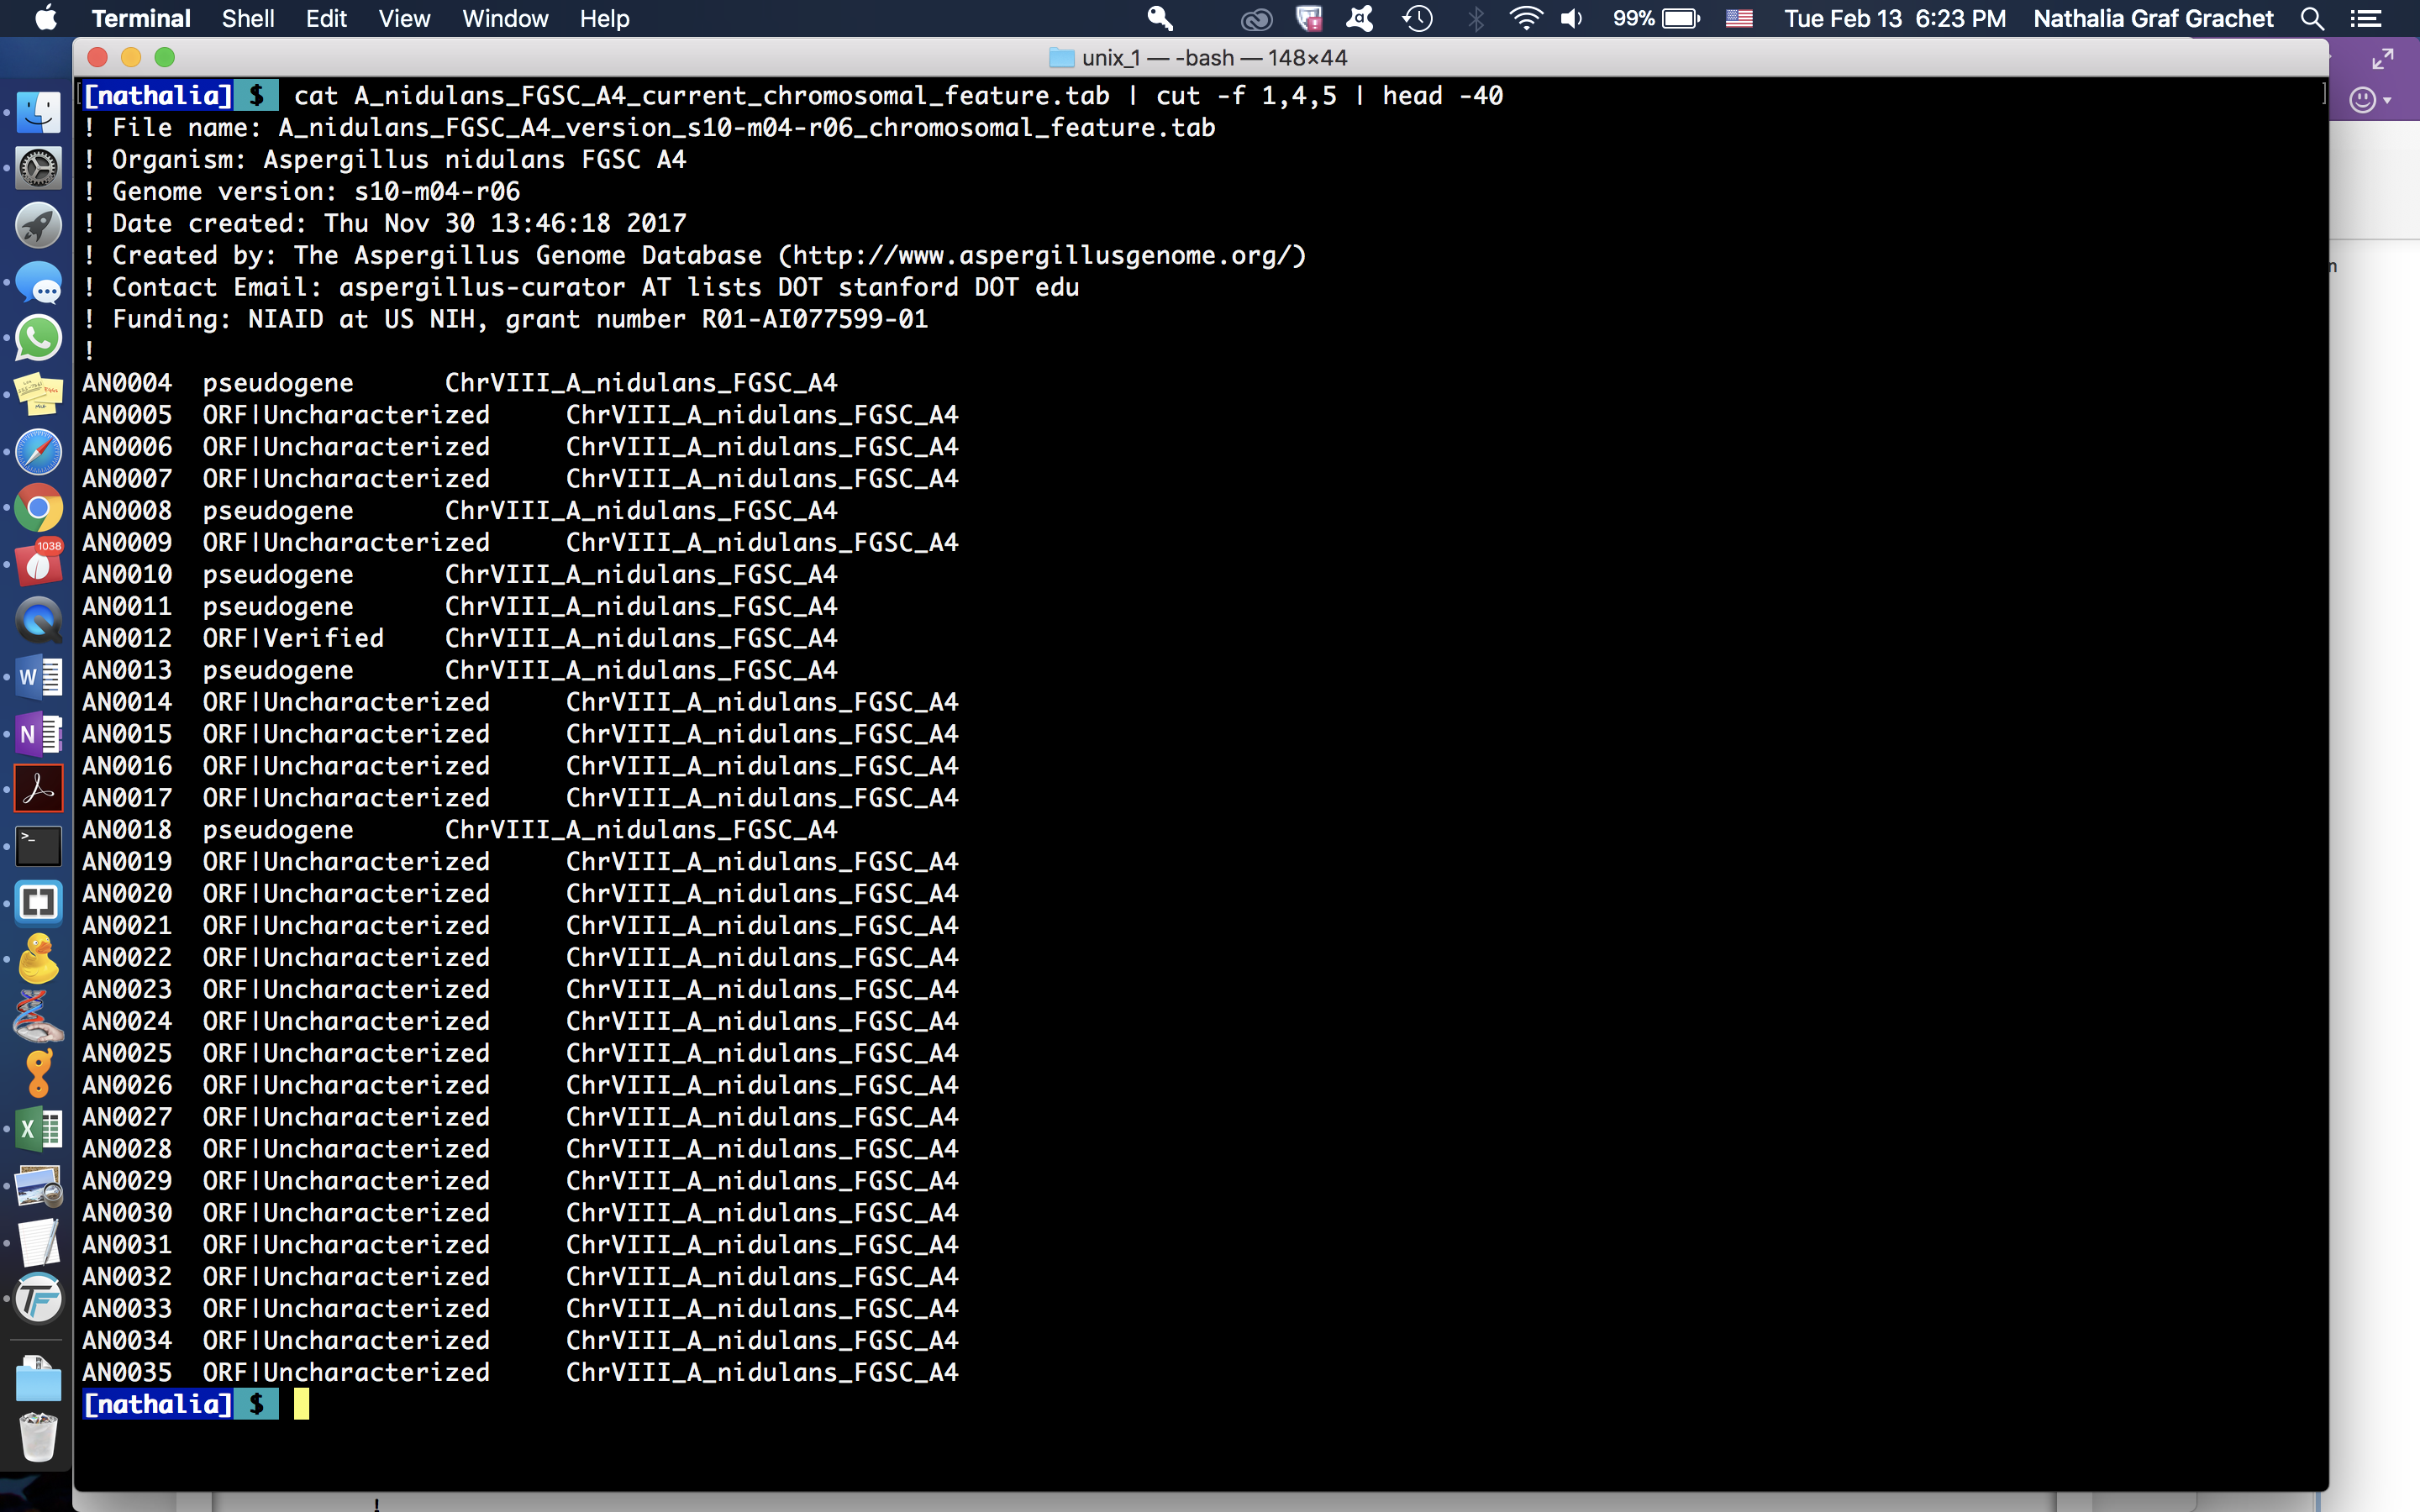

$ cat A_nidulans_FGSC_A4_current_chromosomal_feature.tab | cut -f 1,4,5 > output_A_nidulans_filtered_features.txt

$ less output_A_nidulans_filtered_features.txt 

Let's work with filtered_features.txt because it is less cluttered.  
Look at the second column... what can we see?   

        pseudogene, ORF|Uncharacterized, ORF|Verified... 

Do we have to scroll down to see all the UNIQUE 'annotations'?!  
No... we can use sort & uniq (:
                              
Build up the pipe step by step.

Also, to safe your finger tips hit the <b>upper-arrow</b> key multiple times to search the history of the commands you just typed.  
So when building the pipe, you don't have to type the same thing over and over.   
Hit the upper-arrow key and continue building the pipe.

In [1]:
$ cat output_A_nidulans_filtered_features.txt | sed '1,8d' | cut -f 2 | sort | uniq

ORF|Merged/Split|Uncharacterized
ORF|Merged/Split|Verified
ORF|Uncharacterized
ORF|Uncharacterized|Merged/Split
ORF|Uncharacterized|transposable element gene
ORF|Verified
multigene locus
ncRNA|Uncharacterized
ncRNA|Verified
pseudogene
pseudogene|Verified
pseudogene|transposable element gene
rRNA|Uncharacterized
tRNA|Uncharacterized
tRNA|Verified
uORF|Uncharacterized
uORF|Verified


Look at all the options now!  
Repeat pipe and redirect output

$ cat output_A_nidulans_filtered_features.txt | sed '1,8d' output_A_nidulans_filtered_features.txt | cut -f 2 | sort | uniq > output_A_nidulans_filtered_annotations.txt

# Challenge - pipes:

1. How many times " ORF|Uncharacterized " appears on the 2nd column?
2. How many times " pseudogene " appears on the 2nd column?
3. Does the standard gene name column list each gene name (those named 'AN###') only once?
4. Which word of the 2nd column appears 199 times? (tip: check the uniq manual...)

### Tricks

1. Wildcard  
The wildcard * is going to match that a pattern before running a command.  

2. For loop  
A loop is an iteration statement that will be repeatedly executed. 

In the example below it will list any file that ends with .txt  
The wildcard can be used more than once in order to match your pattern of interest.  

In [5]:
$ ls *.txt

output_A_nidulans_fasta_headers.txt
output_A_nidulans_filtered_features.txt
poem.txt
poem_original.txt
test_original.txt


In [8]:
$ ls A_nidulans*

A_nidulans_FGSC_A4_current_chromosomal_feature.tab
A_nidulans_FGSC_A4_current_chromosomes.fasta
A_nidulans_FGSC_A4_current_chromosomes.fasta.gz


In [10]:
$ ls *FGSC_A4*

A_nidulans_FGSC_A4_current_chromosomal_feature.tab
A_nidulans_FGSC_A4_current_chromosomes.fasta
A_nidulans_FGSC_A4_current_chromosomes.fasta.gz


This is a basic for loop syntax:

$ for VARIABLE in SOMEWHERE;  
 do command1;   
 command2;  
 commandN;  
done   

OR

$ for VARIABLE in SOMEWHERE; do command1; command2; commandN; done  


  
The VARIABLE is an arbitrary name that you choose.   
SOMEWHERE can be a file or a directory. 

In the examples below, I want to execute 2 commands in files that begin with A_nidulans*   
Build a for loop step by step, like a pipe.

In [27]:
$ for i in {1..5}; do echo "Hello $i times"; done

Hello 1 times
Hello 2 times
Hello 3 times
Hello 4 times
Hello 5 times


In [25]:
$ for file in A_nidulans*; do echo $file; done  # echo is a print statement

A_nidulans_FGSC_A4_current_chromosomal_feature.tab
A_nidulans_FGSC_A4_current_chromosomes.fasta
A_nidulans_FGSC_A4_current_chromosomes.fasta.gz


In [24]:
$ for file in A_nidulans*; do echo file; done # Notice the importance of $ to represent the variable we determined

file
file
file


In [23]:
$ for file in output_*; do echo $file; echo ; head -10 $file; echo; done

output_A_nidulans_fasta_headers.txt

>ChrIII_A_nidulans_FGSC_A4 (3470897 nucleotides)
>ChrII_A_nidulans_FGSC_A4 (4070060 nucleotides)
>ChrIV_A_nidulans_FGSC_A4 (2887738 nucleotides)
>ChrI_A_nidulans_FGSC_A4 (3759208 nucleotides)
>ChrVIII_A_nidulans_FGSC_A4 (4934093 nucleotides)
>ChrVII_A_nidulans_FGSC_A4 (4550218 nucleotides)
>ChrVI_A_nidulans_FGSC_A4 (3407944 nucleotides)
>ChrV_A_nidulans_FGSC_A4 (3403833 nucleotides)

output_A_nidulans_filtered_features.txt

! File name: A_nidulans_FGSC_A4_version_s10-m04-r06_chromosomal_feature.tab
! Organism: Aspergillus nidulans FGSC A4
! Genome version: s10-m04-r06
! Date created: Thu Nov 30 13:46:18 2017
! Created by: The Aspergillus Genome Database (http://www.aspergillusgenome.org/)
! Contact Email: aspergillus-curator AT lists DOT stanford DOT edu
! Funding: NIAID at US NIH, grant number R01-AI077599-01
!
AN0004	pseudogene	ChrVIII_A_nidulans_FGSC_A4
AN0005	ORF|Uncharacterized	ChrVIII_A_nidulans_FGSC_A4



'Nathy I am addicted to for loops!!'

I told you this is fun... But just one more... Let's download another Aspergillus genome, and play with for loops. 

Copy link #3:

In [28]:
$ curl -O http://www.aspergillusgenome.org/download/sequence/A_flavus_NRRL_3357/current/A_flavus_NRRL_3357_chromosomes.fasta.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0   841k      0  0:00:13  0:00:13 --:--:--  824k


In [30]:
$ gunzip A_flavus_NRRL_3357_chromosomes.fasta.gz

$ cp A_flavus_NRRL_3357_chromosomes.fasta originals/

In [33]:
$ for file in A_*.fasta; do echo $file; done # Making sure I am grabing the correct files

A_flavus_NRRL_3357_chromosomes.fasta
A_nidulans_FGSC_A4_current_chromosomes.fasta


# Challenge - for loop:

Create a for loop that will execute the following on the A_nidulans and A_flavus genomes:

1. Print the file name
2. Print the number of fasta sequences followed by the word contigs
3. Print all the fasta headers


But my heart is soft... like room-temperature butter...

Here is the answer:

And a tip to help you out... 

You'll need to create a variable that will contain the command to count the number of fasta headers.

Ask Google how to assign a value to a variable in unix, and the answer is in the first page...

In [8]:
$ a='Hello'
$ b='World'
$ echo $a $b

Hello World


# Nathy's tips:

1. Be descriptive in naming your files.
2. DO NOT use   space "  " in your file name! I_mean_NEVER_use_spaces!
3. Treat your scripts as experiments.
4. Errors are not failures. Experienced programmers make erros ALL THE TIME.
5. Keep track of your scripts and useful commands - Look up GitHub.
6. Practice is very important.
7. Take OSU Carpentry Workshops or any other workshops if you can.
8. pwd, ls, tab auto-complete, and upper-arrow key ALL THE TIME.
9. Did I say practice?